In [1]:
import numpy as np
import pandas as pd 

In [2]:
df_corrupted = pd.read_csv('monthly-sunspots_corrupted.csv')
df_org = pd.read_csv('monthly-sunspots.csv')

In [3]:
df_corrupted = df_corrupted[['Sunspots']]
dropped_corr = df_corrupted[df_corrupted.Sunspots != -1]
dropped_corr

,Sunspots
0,58.0
1,62.6
2,70.0
3,55.7
4,85.0
...,...
2815,71.8
2816,50.3
2817,55.8
2818,33.3


In [4]:
df_org = df_org[['Sunspots']]
df_org

,Sunspots
0,58.0
1,62.6
2,70.0
3,55.7
4,85.0
...,...
2815,71.8
2816,50.3
2817,55.8
2818,33.3


In [5]:
org = df_org.to_numpy().reshape((-1))  # (2820,)
corr = df_corrupted.to_numpy().reshape((-1))  # (2820,)
dropped = dropped_corr.to_numpy().reshape((-1))  # (2792,)

In [6]:
def make_dataset_for_timeSeries(npArr , window_size = 15):
    X=[]
    Y=[]
    for i in range(window_size , npArr.shape[0]):
        X.append(npArr[i-window_size : i])
        Y.append(npArr[i])
    return np.asarray(X) , np.asarray(Y)

In [7]:
window_size = 30
X,Y = make_dataset_for_timeSeries(dropped , window_size)

In [8]:
X.shape  # (2762, 30)

(2762, 30)

In [9]:
 from sklearn.model_selection import train_test_split

 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

 X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [10]:
X_val[0].shape

(30,)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import tensorflow as tf


model = Sequential()
model.add(tf.keras.Input(shape=(window_size,1)))
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# model.add(Dropout(0.5))
# model.add(MaxPooling1D(pool_size=2))
  

model.add(Conv1D(filters=64, kernel_size=5, padding="causal", activation='tanh'))
model.add(Dropout(0.5))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(filters=64, kernel_size=7,padding="causal" , activation='tanh'))
# model.add(Dropout(0.5))
# model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))


In [12]:


model.compile(loss = tf.keras.losses.Huber(),
             optimizer = 'adam',
             metrics = ['mae'])


EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

history = model.fit(X_train, y_train,validation_data=(X_val ,y_val),  epochs=500 ,  batch_size=100)

Epoch 1/500
17/17 [==============================] - 4s 29ms/step - loss: 45.0056 - mae: 45.4981 - val_loss: 43.9569 - val_mae: 44.4522
Epoch 2/500
17/17 [==============================] - 0s 10ms/step - loss: 42.1414 - mae: 42.6378 - val_loss: 42.9725 - val_mae: 43.4681
Epoch 3/500
17/17 [==============================] - 0s 9ms/step - loss: 41.0730 - mae: 41.5691 - val_loss: 42.2712 - val_mae: 42.7623
Epoch 4/500
17/17 [==============================] - 0s 12ms/step - loss: 40.4137 - mae: 40.9097 - val_loss: 41.6546 - val_mae: 42.1506
Epoch 5/500
17/17 [==============================] - 0s 11ms/step - loss: 39.8459 - mae: 40.3422 - val_loss: 41.0948 - val_mae: 41.5928
Epoch 6/500
17/17 [==============================] - 0s 10ms/step - loss: 39.2676 - mae: 39.7637 - val_loss: 40.5664 - val_mae: 41.0642
Epoch 7/500
17/17 [==============================] - 0s 9ms/step - loss: 38.7616 - mae: 39.2581 - val_loss: 40.0678 - val_mae: 40.5642
Epoch 8/500
17/17 [==============================]

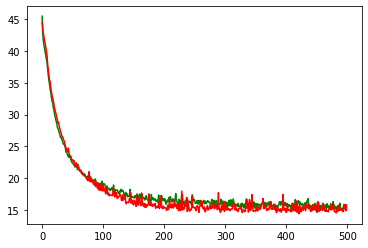

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['mae'] , color = 'green')
plt.plot(history.history['val_mae'] , color = 'red')

In [14]:
from keras.layers import GRU , Bidirectional


model1 = Sequential()
model1.add(tf.keras.Input(shape=(window_size,1)))
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# model.add(Dropout(0.5))
# model.add(MaxPooling1D(pool_size=2))
model1.add(GRU(60, return_sequences=True))
model1.add(GRU(60, return_sequences=True))
# model1.add(MaxPooling1D(pool_size=2))
# model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# model1.add(Dropout(0.5))
# model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(100, activation='tanh'))
model1.add(Dropout(0.5))
model1.add(Dense(64, activation='tanh'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='relu'))

In [15]:


model1.compile(loss = tf.keras.losses.Huber(),
             optimizer = 'adam',
             metrics = ['mae'])


history1 = model1.fit(X_train, y_train,validation_data=(X_val ,y_val),  epochs=500 ,  batch_size=100)

Epoch 1/500
17/17 [==============================] - 4s 49ms/step - loss: 44.0608 - mae: 44.5555 - val_loss: 43.2859 - val_mae: 43.7824
Epoch 2/500
17/17 [==============================] - 0s 10ms/step - loss: 41.5003 - mae: 41.9963 - val_loss: 42.3967 - val_mae: 42.8880
Epoch 3/500
17/17 [==============================] - 0s 10ms/step - loss: 40.5556 - mae: 41.0495 - val_loss: 41.7188 - val_mae: 42.2145
Epoch 4/500
17/17 [==============================] - 0s 10ms/step - loss: 39.8097 - mae: 40.3023 - val_loss: 40.8358 - val_mae: 41.3277
Epoch 5/500
17/17 [==============================] - 0s 9ms/step - loss: 38.8907 - mae: 39.3827 - val_loss: 39.6877 - val_mae: 40.1756
Epoch 6/500
17/17 [==============================] - 0s 10ms/step - loss: 37.8691 - mae: 38.3567 - val_loss: 38.8423 - val_mae: 39.3294
Epoch 7/500
17/17 [==============================] - 0s 10ms/step - loss: 37.0477 - mae: 37.5366 - val_loss: 37.9721 - val_mae: 38.4567
Epoch 8/500
17/17 [==============================

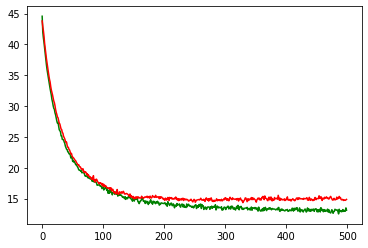

In [16]:
plt.plot(history1.history['mae'] , color = 'green')
plt.plot(history1.history['val_mae'] , color = 'red')

In [17]:



model2 = Sequential()
model2.add(tf.keras.Input(shape=(window_size,1)))
# model.add(Dropout(0.5))
# model.add(MaxPooling1D(pool_size=2))
# model2.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# model2.add(Dropout(0.5))
# model2.add(GRU(60, return_sequences=True))
model2.add(Bidirectional(GRU(90)))
# model1.add(MaxPooling1D(pool_size=2))
# model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# model1.add(Dropout(0.5))
# model1.add(MaxPooling1D(pool_size=2))
model2.add(Flatten())
model2.add(Dense(100, activation='tanh'))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='tanh'))
model2.add(Dropout(0.5))
# model2.add(Dense(64, activation='tanh'))
# model2.add(Dropout(0.5))
model2.add(Dense(1, activation='relu'))

In [18]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 180)              50220     
 l)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 180)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               18100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                6464      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                      

In [19]:
model2.compile(loss = tf.keras.losses.Huber(),
             optimizer = 'adam',
             metrics = ['mae'])


history2 = model2.fit(X_train, y_train,validation_data=(X_val ,y_val),  epochs=500 ,  batch_size=100)

Epoch 1/500
17/17 [==============================] - 4s 52ms/step - loss: 45.9039 - mae: 46.3986 - val_loss: 44.5939 - val_mae: 45.0893
Epoch 2/500
17/17 [==============================] - 0s 11ms/step - loss: 42.6186 - mae: 43.1139 - val_loss: 43.4663 - val_mae: 43.9631
Epoch 3/500
17/17 [==============================] - 0s 10ms/step - loss: 41.5196 - mae: 42.0138 - val_loss: 42.4916 - val_mae: 42.9870
Epoch 4/500
17/17 [==============================] - 0s 10ms/step - loss: 40.4297 - mae: 40.9203 - val_loss: 41.3979 - val_mae: 41.8854
Epoch 5/500
17/17 [==============================] - 0s 10ms/step - loss: 39.6037 - mae: 40.0921 - val_loss: 40.5917 - val_mae: 41.0797
Epoch 6/500
17/17 [==============================] - 0s 11ms/step - loss: 38.7777 - mae: 39.2633 - val_loss: 39.8668 - val_mae: 40.3545
Epoch 7/500
17/17 [==============================] - 0s 11ms/step - loss: 38.0317 - mae: 38.5208 - val_loss: 39.0990 - val_mae: 39.5808
Epoch 8/500
17/17 [=============================

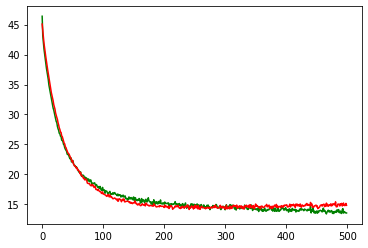

In [20]:
plt.plot(history2.history['mae'] , color = 'green')
plt.plot(history2.history['val_mae'] , color = 'red')